## Importing Libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
print("import done!")

import done!


## Loading the Wine Dataset directly from sklearn

In [13]:
wine = datasets.load_wine()

df = pd.DataFrame(wine.data,columns=wine.feature_names)


df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

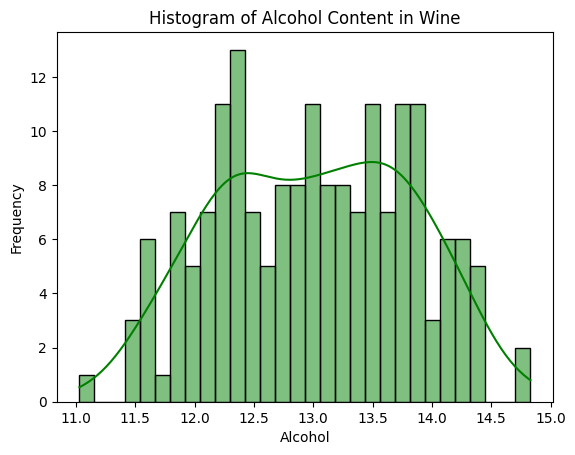

In [18]:
sns.histplot(data=df, x='alcohol', bins=30, kde=True, color='green')
plt.title("Histogram of Alcohol Content in Wine")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

In [23]:
X = wine.data
y = wine.target

print("X values are: " ,wine.feature_names)
print("y values are: " ,wine.target_names)

X values are:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
y values are:  ['class_0' 'class_1' 'class_2']


## Split the Data

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state= 20)

# Initialize SVM with linear kernel
svm_model = SVC(kernel = 'linear')

# Train the model
svm_model.fit(X_train,y_train)

# Predictions
pred =svm_model.predict(X_test)

# Measure the Accuracy
accuracy = accuracy_score(y_test,pred)* 100
print(f"The accuracy of the SVM is: {accuracy: .2f}%")

The accuracy of the SVM is:  98.15%


## Let's use advanced performance metrics

In [26]:
# Confusion_matrix
conf_matrix = confusion_matrix(y_test,pred)
print("Confusion Matrix :\n" ,conf_matrix)


Confusion Matrix :
 [[15  0  0]
 [ 1 26  0]
 [ 0  0 12]]


In [10]:
precision = precision_score(y_test,pred,average='macro')*100
recall = recall_score(y_test,pred,average='macro')*100
f1 = f1_score(y_test,pred,average='macro')*100

print(f"The precision of the SVM is: {precision: .2f}%")
print(f"The recall of the SVM is: {recall: .2f}%")
print(f"The f1_score of the SVM is: {f1: .2f}%")

The precision of the SVM is:  97.92%
The recall of the SVM is:  98.77%
The f1_score of the SVM is:  98.30%
